In [4]:
#random forest implementation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("/Users/Saarth/Desktop/PS1/final_data.csv")
print(train.shape)


(5831, 40)


In [6]:
train.head(10)

,Slab Width,Slab Length,AL,B,C,CA,NB,CR,CU,MN,...,Radiant Tube Furnace Dewpoint,After Tube Cooling Dewpoint,Rapid Jet Cooling Dewpoint,Coating Thickness,Drying Furnace Press,B50,Hardness,Coreloss-Before Aging,Coreloss After Aging,Permeability
0,1265.0,9730.0,0.002,0.0001,0.0012,0.0002,0.0002,0.026,0.006,0.21,...,-18.500,-26.132,-18.206680,1.50,-6.026,1.73,128.0,5.70,5.74,1963.0
1,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-99.000,-99.000,-98.999910,1.55,-6.324,1.73,120.0,5.92,5.92,1921.0
2,1265.0,7810.0,0.002,0.0001,0.0012,0.0002,0.0002,0.026,0.006,0.21,...,-25.112,-23.253,-12.169600,1.48,-6.512,1.72,124.0,5.15,5.15,1853.0
3,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-23.525,-27.873,-12.546780,1.41,-6.806,1.74,121.0,5.42,5.47,2071.0
4,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-19.758,-25.796,-16.476580,1.37,-6.831,1.72,122.0,5.38,5.40,1747.0
5,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-21.789,-21.744,-13.945590,1.43,-5.903,1.73,121.0,5.94,5.98,1925.0
6,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-17.322,-26.088,-17.337910,1.60,-6.239,1.73,127.0,5.93,5.94,1920.0
7,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-22.554,-24.254,-9.078559,1.49,-6.357,1.73,120.0,6.02,6.03,1891.0
8,1265.0,9730.0,0.001,0.0001,0.0015,0.0002,0.0002,0.030,0.005,0.22,...,-23.143,-24.330,-16.884430,1.50,-5.995,1.74,127.0,5.67,5.72,2097.0
9,1265.0,9730.0,0.001,0.0001,0.0015,0.0002,0.0002,0.030,0.005,0.22,...,-20.119,-24.767,-13.863260,1.33,-6.821,1.72,123.0,5.23,5.24,1820.0


In [7]:
train.columns


Index(['Slab Width', 'Slab Length', 'AL', 'B', 'C', 'CA', 'NB', 'CR', 'CU',
       'MN', 'MO', 'N', 'NI', 'P', 'S', 'SI', 'TI', 'V',
       'Reheating Furnace Exit Temp', 'Finishing Temp', 'Coiling Temp',
       'FM Exit Thickness', 'Coil Outr Dia', 'Avg line speed', 'weld pressure',
       'Reduction Ratio', 'ACL-Thickness', 'ACL-Width', 'ACL-Length',
       'O2 in Heating Element Furnace', 'Radiant Tube Furnace Dewpoint',
       'After Tube Cooling Dewpoint', 'Rapid Jet Cooling Dewpoint',
       'Coating Thickness', 'Drying Furnace Press', 'B50', 'Hardness',
       'Coreloss-Before Aging', 'Coreloss After Aging', 'Permeability'],
      dtype='object')

In [8]:
X= train[['Slab Width', 'Slab Length', 'AL', 'B', 'C', 'CA', 'NB', 'CR', 'CU',
       'MN', 'MO', 'N', 'NI', 'P', 'S', 'SI', 'TI', 'V',
       'Reheating Furnace Exit Temp', 'Finishing Temp', 'Coiling Temp',
       'FM Exit Thickness', 'Coil Outr Dia', 'Avg line speed', 'weld pressure',
       'Reduction Ratio', 'ACL-Thickness', 'ACL-Width', 'ACL-Length',
       'O2 in Heating Element Furnace', 'Radiant Tube Furnace Dewpoint',
       'After Tube Cooling Dewpoint', 'Rapid Jet Cooling Dewpoint',
       'Coating Thickness', 'Drying Furnace Press']]

print(X)

      Slab Width  Slab Length     AL       B       C      CA      NB     CR  \
0         1265.0       9730.0  0.002  0.0001  0.0012  0.0002  0.0002  0.026   
1         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
2         1265.0       7810.0  0.002  0.0001  0.0012  0.0002  0.0002  0.026   
3         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
4         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
...          ...          ...    ...     ...     ...     ...     ...    ...   
5826      1290.0       9500.0  0.218  0.0001  0.0023  0.0010  0.0002  0.020   
5827      1290.0       9500.0  0.218  0.0001  0.0023  0.0010  0.0002  0.020   
5828      1290.0       9450.0  0.239  0.0002  0.0019  0.0010  0.0003  0.020   
5829      1290.0       9500.0  0.239  0.0002  0.0019  0.0010  0.0003  0.020   
5830      1290.0       9500.0  0.237  0.0002  0.0022  0.0010  0.0002  0.020   

         CU    MN  ...  Reduction Ratio  ACL-Thickn

In [15]:
print(X)


      Slab Width  Slab Length     AL       B       C      CA      NB     CR  \
0         1265.0       9730.0  0.002  0.0001  0.0012  0.0002  0.0002  0.026   
1         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
2         1265.0       7810.0  0.002  0.0001  0.0012  0.0002  0.0002  0.026   
3         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
4         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
...          ...          ...    ...     ...     ...     ...     ...    ...   
5215      1290.0       9500.0  0.218  0.0001  0.0023  0.0010  0.0002  0.020   
5216      1290.0       9500.0  0.218  0.0001  0.0023  0.0010  0.0002  0.020   
5217      1290.0       9450.0  0.239  0.0002  0.0019  0.0010  0.0003  0.020   
5218      1290.0       9500.0  0.239  0.0002  0.0019  0.0010  0.0003  0.020   
5219      1290.0       9500.0  0.237  0.0002  0.0022  0.0010  0.0002  0.020   

         CU    MN  ...  Coating Thickness  Insulati

In [9]:
y= train[['B50']]

In [10]:
print(y)

       B50
0     1.73
1     1.73
2     1.72
3     1.74
4     1.72
...    ...
5826  1.73
5827  1.73
5828  1.73
5829  1.73
5830  1.73

[5831 rows x 1 columns]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [14]:
df = pd.DataFrame(X_train)
t=df.to_numpy()

dm=pd.DataFrame(y_train)
p=dm.to_numpy()

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(t.reshape(-1,35), p.reshape(-1,1))

<ipython-input-14-a1792440fddb>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(t.reshape(-1,35), p.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
y_pred = regressor.predict(X_test)

we=pd.DataFrame(y_test)
yt= we.to_numpy()

wq= pd.DataFrame(y_pred)
yp= wq.to_numpy()




dk = pd.DataFrame({'Real Values':yt.reshape(-1), 'Predicted Values':yp.reshape(-1)})
dk


from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(yt,yp))
print('MSE:', metrics.mean_squared_error(yt,yp))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yt,yp)))

regressor.score(X_test,yt)

from sklearn.metrics import r2_score

r1=r2_score(yt,yp)
print('r1',r1)


MAE: 0.0066083976006855285
MSE: 8.234618680377048e-05
RMSE: 0.009074479974288912
r1 0.8359716700804387


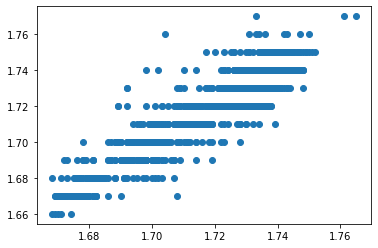

In [16]:
plt.scatter(yp,yt)